# Case4 : Two dimensional centered normal-like density supported only on six orthants

In this notebook, we estimate normal-like density on two-dimensional tree space by log-concave MLE. 

In [1]:
# importing packages
import lcdtreespace as lcd
import pandas as pd
import numpy as np
from importlib.resources import files
import os
import matplotlib.pyplot as plt

## sample data

We estimate following normal-like density on two-dimensional tree space:
$$f(x) \propto \begin{cases}\exp(-d(x,0)^2/2) & \text{ if } x \text{ is in one of the orthants } \{(0,1), (1, 6), (6, 8), (3, 8), (3, 4), (0, 4)\} \\ 
0 & \text{otherwise}\end{cases}$$

The density is plotted below on each orthant

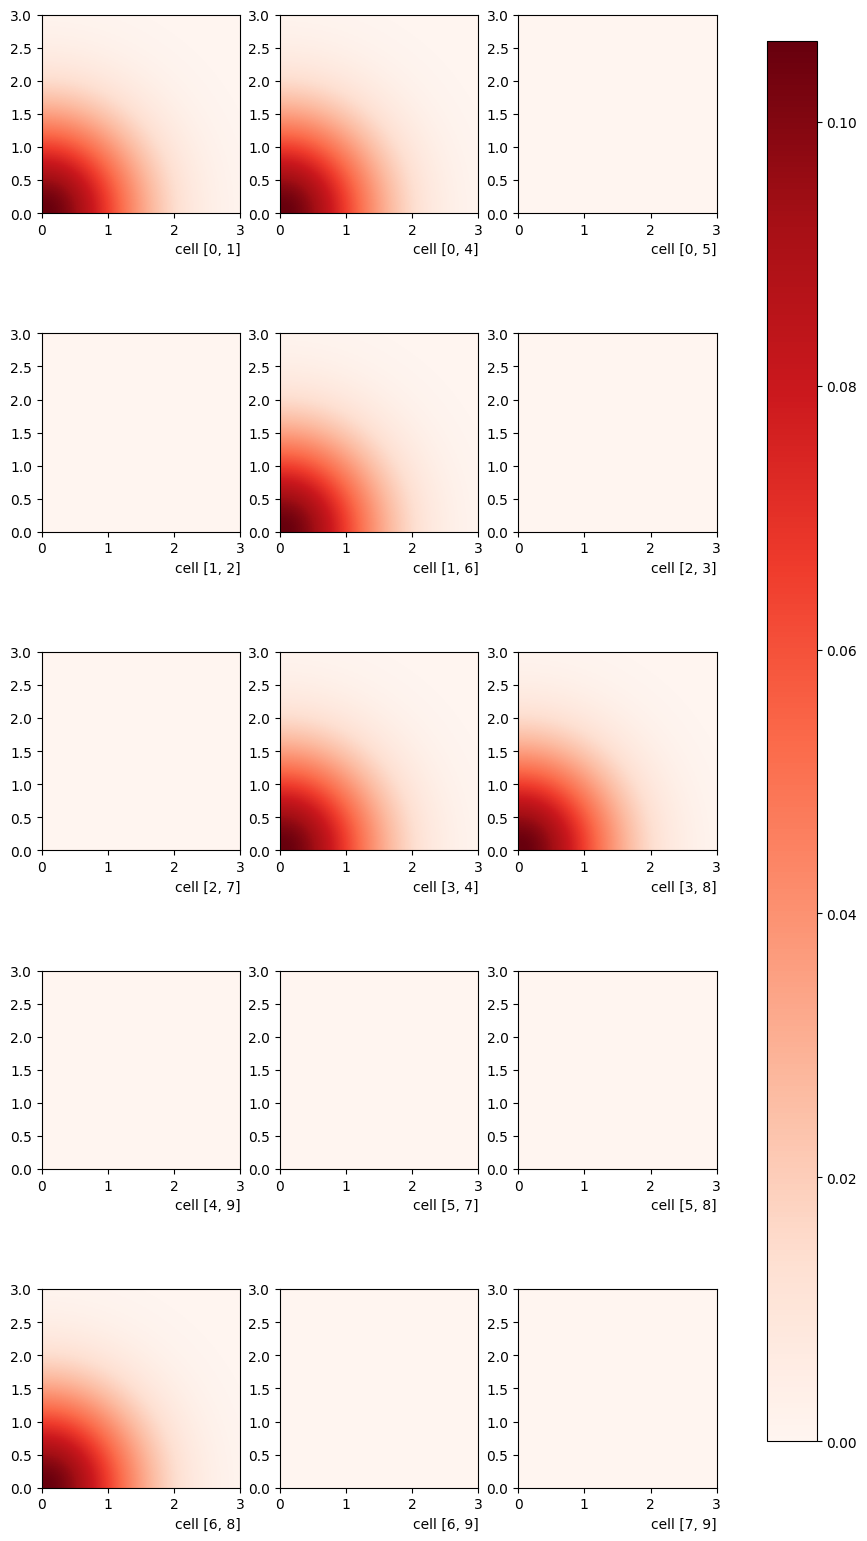

In [2]:
cells = [(0,1),(1,6),(6,8),(3,8),(3,4),(0,4)] # supported on all orthants
true_density = lcd.normal_centered_2dim(cells, sigma=1) # true density
lcd.plot_density_2dim(true_density, xmax=3, ymax=3)
print("")

Package lcdtreespace has sample data drawn from this density at ```files("lcdtreespace").joinpath("data", "case4")```. 

The file "testcase_{$n$}\_{$i$}.csv" contain sample points.

Here, we compute the log-concave MLE from "testcase_100_0.csv" file.

In [4]:
# list of sample data available
np.sort(os.listdir(files("lcdtreespace").joinpath("data", "case4")))[:10]
# see full list with
# np.sort(os.listdir(files("lcdtreespace").joinpath("data", "case4")))

array(['testcase_1000_0.csv', 'testcase_1000_1.csv',
       'testcase_1000_2.csv', 'testcase_1000_3.csv',
       'testcase_1000_4.csv', 'testcase_1000_5.csv',
       'testcase_1000_6.csv', 'testcase_1000_7.csv',
       'testcase_1000_8.csv', 'testcase_1000_9.csv'], dtype='<U19')

In [5]:
# load data
X = pd.read_csv(files("lcdtreespace").joinpath("data", "case4", "testcase_100_0.csv"))
X.head()
#edge1, edge2 represents the orthant, "x1" and "x2" are the correspoinding coordinates. "
#"angle" is given by tan(x2/x1), while "y" has initial log-likelihood (parameter to be estimated. The initiali value is not normalized to be a density nor log-concave function)

,edge1,edge2,x1,x2,angle,y
0,0,1,2.048546,0.810010,0.376541,-5.408935
1,0,1,0.948920,2.256588,1.172734,-4.743022
2,0,1,0.570837,0.793537,0.947197,-6.816398
3,0,1,0.322484,0.747749,1.163624,-5.075901
4,0,1,1.801246,0.576848,0.309929,-5.670331


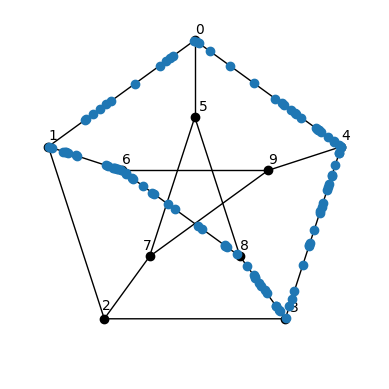

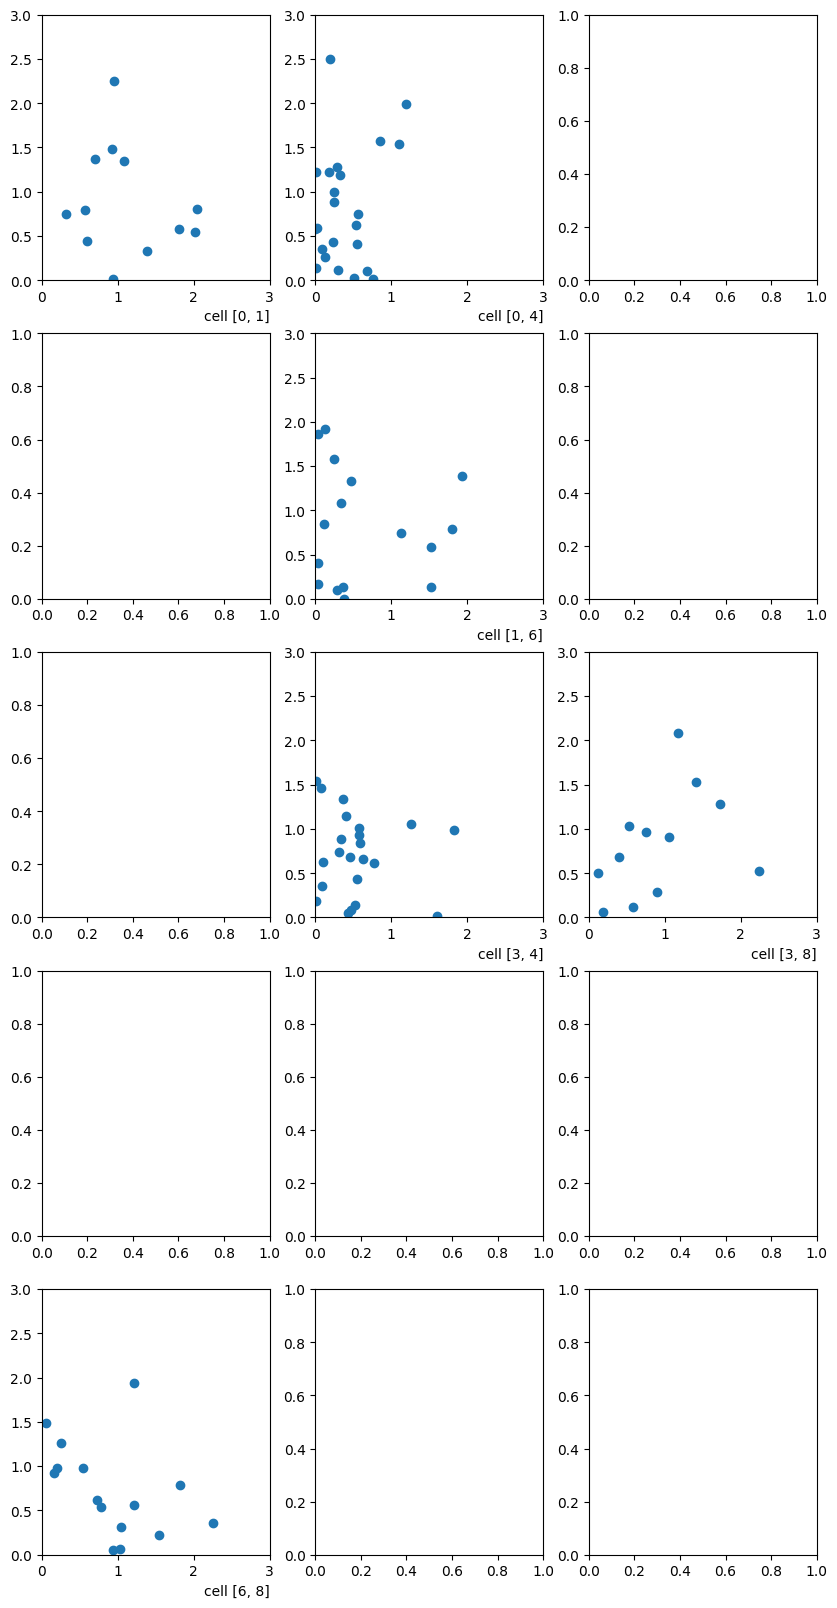

In [6]:
# scatter plot of sample points on petersen graph and on each orthant
lcd.plot_petersen(X)
lcd.plot_scatter_2dim(X, xmax=3, ymax=3)
print("")

## Computation of log-concave MLE

The computation of one dimensional log-concave MLE can be done by ```lcd.lcmle_2dim``` function. 

In [7]:
opt_y = lcd.lcmle_2dim(X=X,print_objective=True)
# integral should converge to 1

integral: 0.51871,    objective: 5.48695
integral: 0.49416,    objective: 5.45758
integral: 0.42442,    objective: 5.36859
integral: 0.37605,    objective: 5.28765
integral: 0.33905,    objective: 5.18368
integral: 0.35199,    objective: 5.05978
integral: 0.40554,    objective: 4.97244
integral: 0.61860,    objective: 4.87246
integral: 0.65021,    objective: 4.85905
integral: 0.67994,    objective: 4.83535
integral: 0.70889,    objective: 4.79609
integral: 0.71446,    objective: 4.74483
integral: 0.67735,    objective: 4.69229
integral: 0.63990,    objective: 4.65073
integral: 0.65331,    objective: 4.63501
integral: 0.66490,    objective: 4.60897
integral: 0.68360,    objective: 4.56107
integral: 0.78386,    objective: 4.51731
integral: 0.71764,    objective: 4.48461
integral: 0.64858,    objective: 4.43380
integral: 0.64661,    objective: 4.38507
integral: 0.69159,    objective: 4.36075
integral: 0.71207,    objective: 4.33898
integral: 0.70277,    objective: 4.31874
integral: 0.6585

integral: 0.99951,    objective: 3.80957
integral: 0.99955,    objective: 3.80957
integral: 0.99956,    objective: 3.80957
integral: 0.99958,    objective: 3.80956
integral: 0.99961,    objective: 3.80956
integral: 0.99965,    objective: 3.80956
integral: 0.99969,    objective: 3.80956
integral: 0.99975,    objective: 3.80955
integral: 0.99981,    objective: 3.80955
integral: 0.99985,    objective: 3.80955
integral: 0.99988,    objective: 3.80954
integral: 0.99986,    objective: 3.80954
integral: 0.99985,    objective: 3.80954
integral: 0.99981,    objective: 3.80953
integral: 0.99975,    objective: 3.80953
integral: 0.99966,    objective: 3.80953
integral: 0.99956,    objective: 3.80953
integral: 0.99942,    objective: 3.80952
integral: 0.99922,    objective: 3.80952
integral: 0.99909,    objective: 3.80951
integral: 0.99888,    objective: 3.80953
integral: 0.99907,    objective: 3.80951
integral: 0.99902,    objective: 3.80951
integral: 0.99892,    objective: 3.80951
integral: 0.9987

In [8]:
# density object
lcmle = lcd.logconcave_density_estimate_2dim(opt_y, X) # log-concave MLE

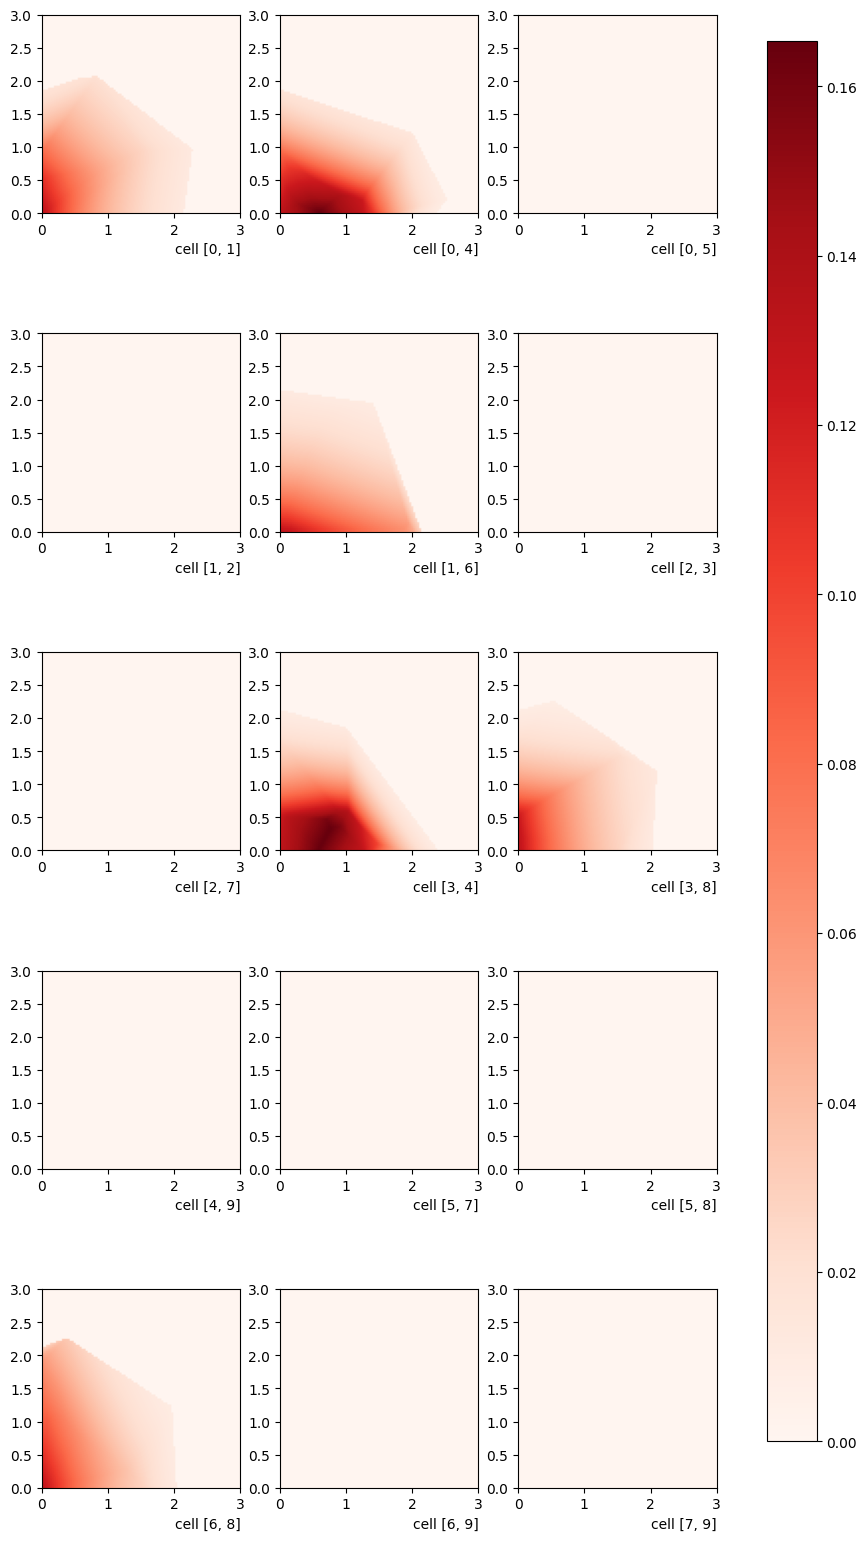

In [9]:
# plot of estimated density
lcd.plot_density_2dim(lcmle, xmax=3, ymax=3)
print("")

## Kernel density estimator
To compare the result, we also compute the kernel density estimator from the same sample.

In [10]:
kde = lcd.kernel_density_estimate_2dim(X)

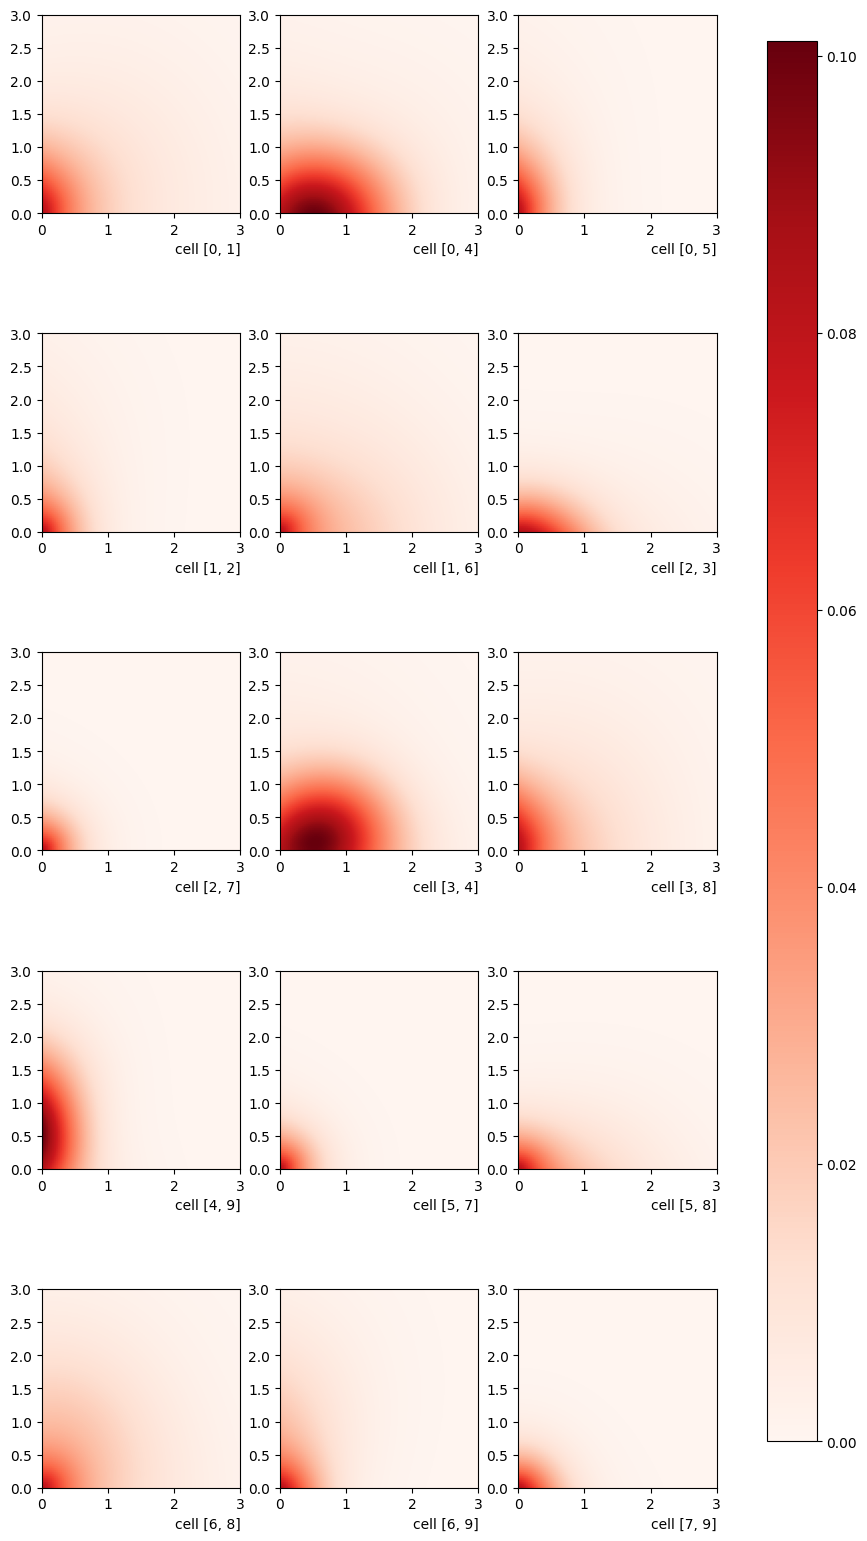

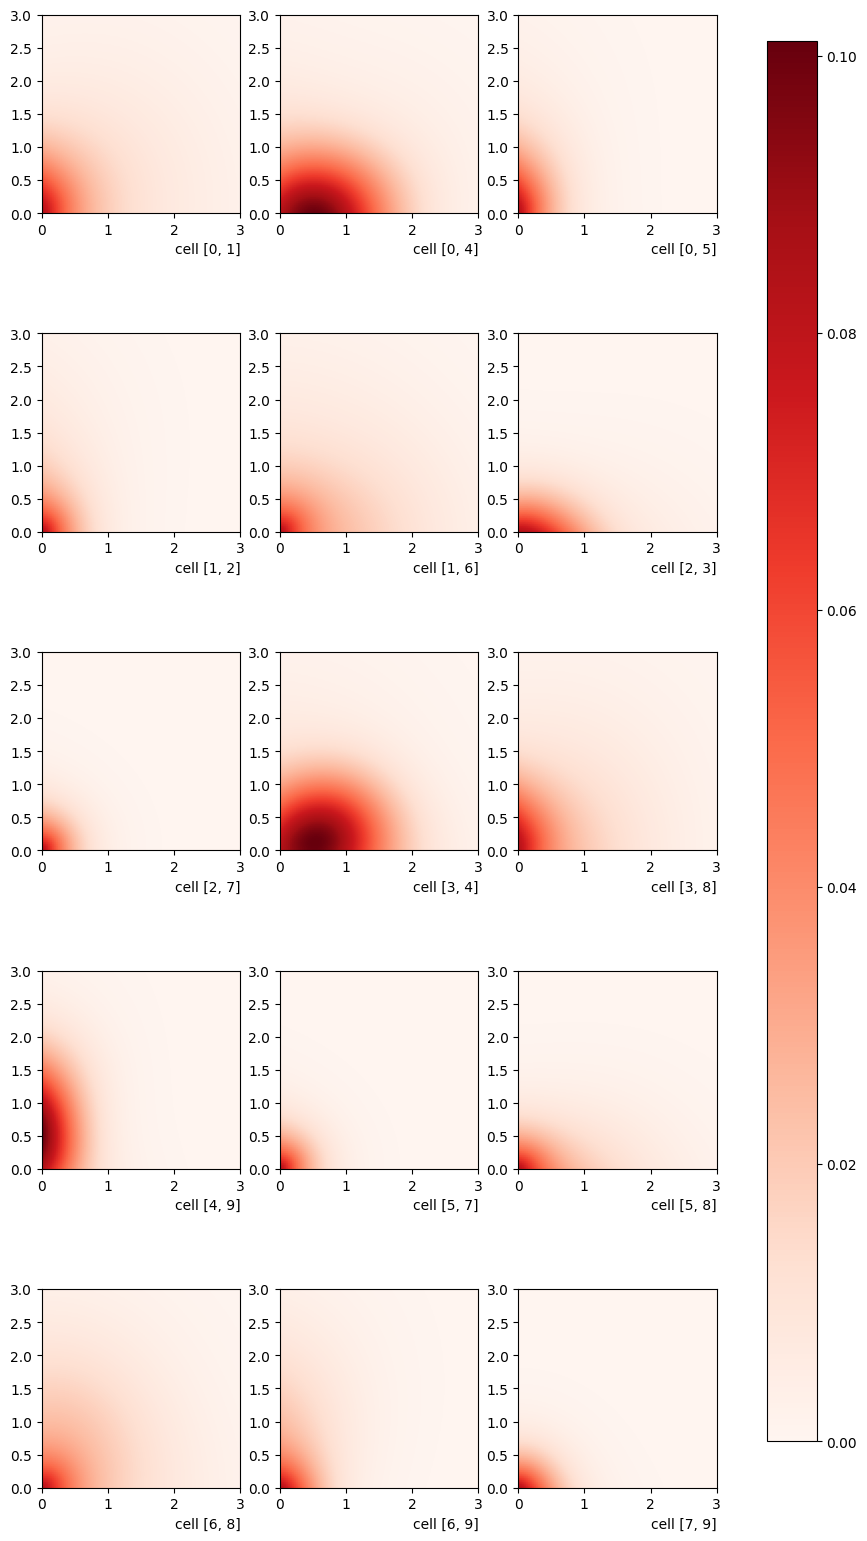

In [11]:
# plot of kernel density estimate
lcd.plot_density_2dim(kde, xmax=3, ymax=3)

## Computation of Integrated Squared Error (ISE)

In [12]:
# calculation of integrted squared error
lcmle_ise, lcmle_err = lcd.ise_2dim(true_density, lcmle, epsabs = 1e-4)
kde_ise, kde_err = lcd.ise_2dim(true_density, kde, epsabs = 1e-4)

In [13]:
lcmle_ise, kde_ise

(0.009140623306798773, 0.023329259330992114)